In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

%matplotlib inline

In [5]:
df=pd.read_csv('auto-mpg-cleaned-no-outliers.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


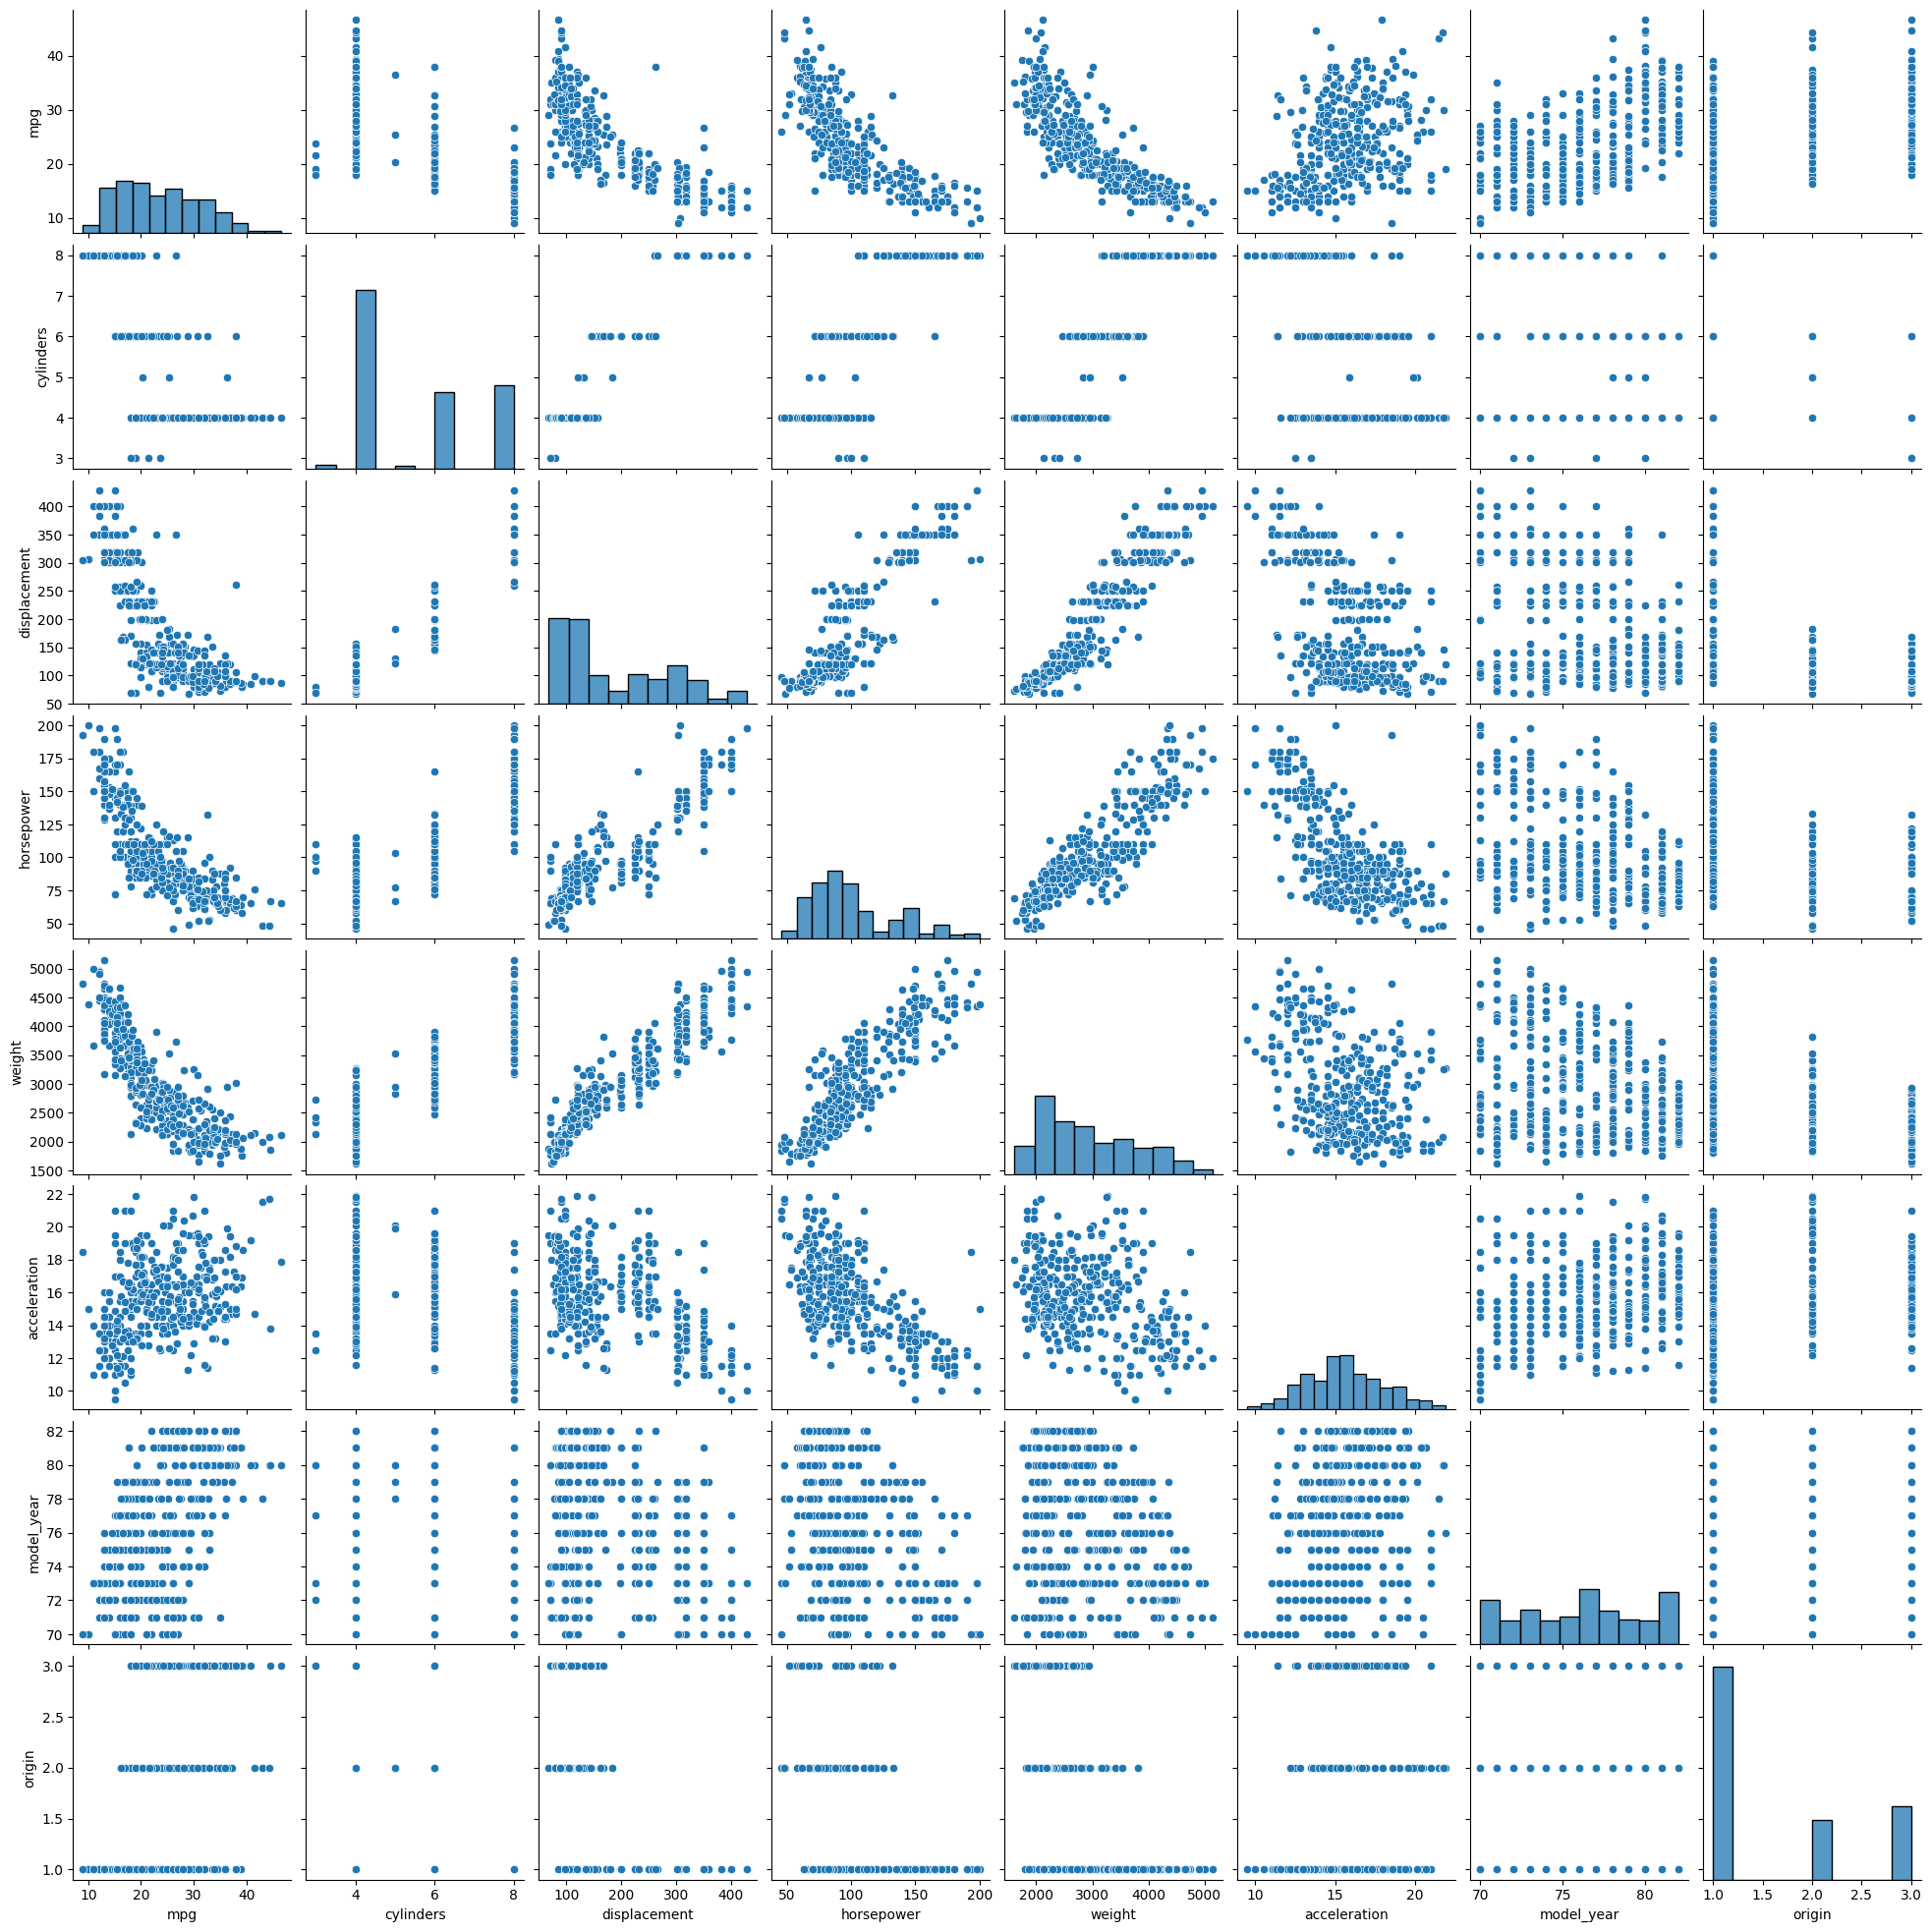

In [7]:
sns.pairplot(df)
plt.show()

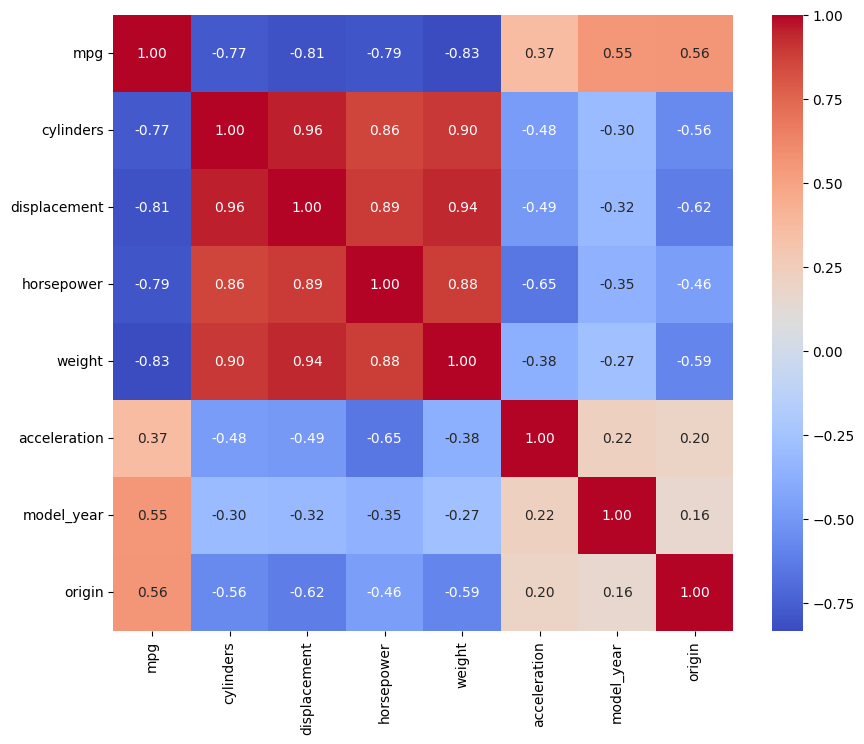

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

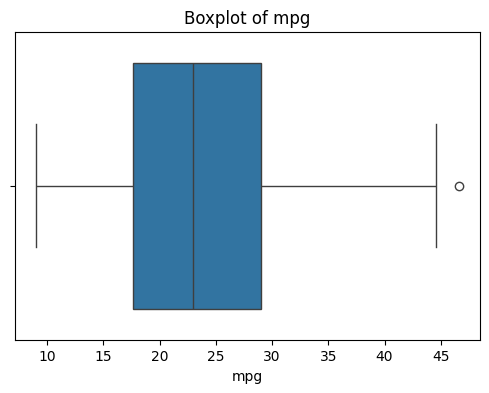

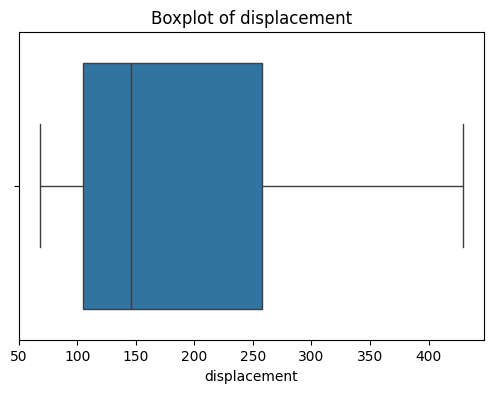

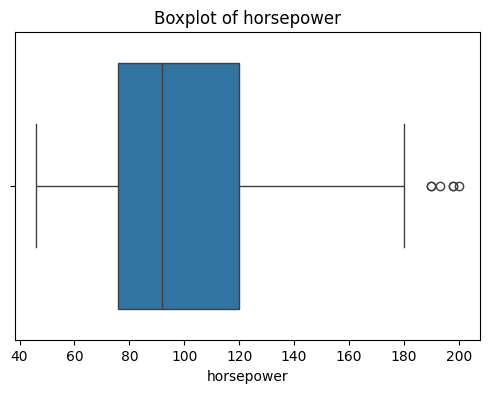

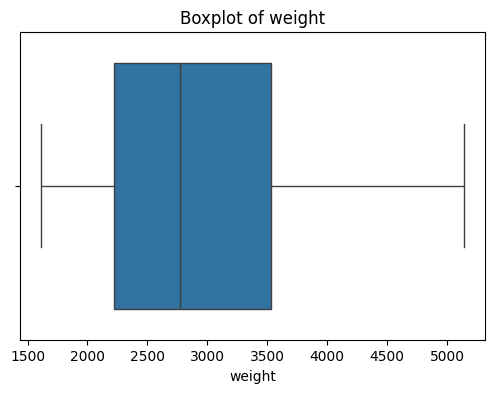

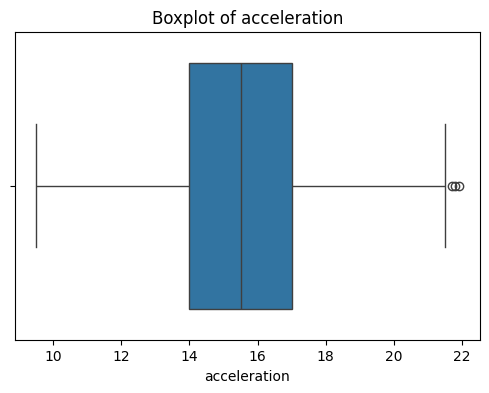

In [9]:
cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [10]:
corr_with_target = df.corr()['mpg'].sort_values(ascending=False)
print(corr_with_target)


mpg             1.000000
origin          0.562451
model_year      0.551928
acceleration    0.367520
cylinders      -0.771247
horsepower     -0.790232
displacement   -0.805049
weight         -0.832193
Name: mpg, dtype: float64


In [11]:
# Independent and dependent features
X = df[['weight', 'horsepower', 'displacement', 'acceleration', 'model_year', 'origin']]
y = df['mpg']

In [24]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=48)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
## Create a function to Evaluate the model
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for model_name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Display
    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.0649
- Mean Absolute Error: 2.3603
- R2 Score: 0.8319
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.6063
- Mean Absolute Error: 2.5833
- R2 Score: 0.7934


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3880
- Mean Absolute Error: 1.7607
- R2 Score: 0.8979
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.2654
- Mean Absolute Error: 2.1114
- R2 Score: 0.8306


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.9974
- Mean Absolute Error: 0.7215
- R2 Score: 0.9822
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.1005
- Mean Absolute Error: 1.8743
- R2 Score: 0.8473




In [36]:
## HyperParameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "sqrt","log2" ,8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}


In [38]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params)          
                   ]

In [40]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    
    # Use scaled X
    random.fit(X_train_scaled, y_train)
    
    model_param[name] = random.best_params_

# Display best params
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None}


In [72]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators= 100, min_samples_split= 2, max_features= 'log2', max_depth= None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.0584
- Mean Absolute Error: 0.7773
- R2 Score: 0.9799
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.1809
- Mean Absolute Error: 1.9175
- R2 Score: 0.8392




In [76]:
import joblib

# Save model
joblib.dump(model, 'random_forest_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']